## Palestine HRP Civilian Targeting Events and Fatalities Analysis"

###  Description:
This notebook analyzes civilian targeting events and fatalities in Palestine, presenting the data on a month-to-year basis. It provides insights into the distribution of such events across different regions and time periods. The analysis focuses on tracking trends, identifying high-risk areas, and understanding the impact of the conflict on civilian populations.

### Objective:
To analyze the targeting of civilians in Palestine over different time periods.
To identify patterns and trends in fatality data.
To explore geographical distributions of incidents.


### Data Overview:
Source: Dataset on civilian targeting events and fatalities by month and year, as of May 29, 2024.
Key Variables:
Country: The country under analysis (Palestine).
Admin1: Regional-level administrative divisions.
Admin2: Further subdivision of regions.
ISO3: ISO code for regions.
Month/Year: The timeline for the events.
Fatalities: Number of deaths caused by the events.
Event Type: Type of incidents, such as airstrikes, bombings, shootings, etc.

###  Methodology:
Data visualization and statistical techniques to highlight important trends in civilian fatalities across time. It may also use geographic mapping to show the spread and intensity of events across different regions of Palestine.

### Key Metrics:
Fatality Rate per Month/Year: Tracking the number of fatalities over time.
Regional Distribution of Events: Mapping events to different administrative divisions (Admin1, Admin2).
Trends: Identifying any seasonal or annual spikes in violence.
Event Classification: Categorizing events by type and their impact.

In [140]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading The Data 

# Load the dataset
file_path = 'C:/Users/faraz/Downloads/Niksun/ml_datasets/War_21st Century_Israel-Hamas_War/hostilies.csv'
data = pd.read_csv(file_path)


data.head()

,date,killed total,killed female,killed male,killed undefined,injured,displaced,damaged housing units
0,07-Oct-23,275,6.0,269.0,0.0,NaN,NaN,NaN
1,08-Oct-23,451,64.0,387.0,0.0,NaN,NaN,NaN
2,09-Oct-23,681,145.0,536.0,0.0,NaN,NaN,NaN
3,10-Oct-23,927,234.0,693.0,0.0,NaN,NaN,NaN
4,11-Oct-23,1206,355.0,851.0,0.0,NaN,NaN,NaN


### Preprocess the data


In [102]:
data.info()

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   245 non-null    object 
 1   killed total           245 non-null    int64  
 2   killed female          152 non-null    float64
 3   killed male            152 non-null    float64
 4   killed undefined       152 non-null    float64
 5   injured                123 non-null    float64
 6   displaced              229 non-null    float64
 7   damaged housing units  123 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.4+ KB


date                       0
killed total               0
killed female             93
killed male               93
killed undefined          93
injured                  122
displaced                 16
damaged housing units    122
dtype: int64

In [103]:
# Drop unnamed columns that are fully empty
clean_data = data.dropna(axis=1, how='all')

# Display the cleaned data
clean_data.head()

,date,killed total,killed female,killed male,killed undefined,injured,displaced,damaged housing units
0,07-Oct-23,275,6.0,269.0,0.0,NaN,NaN,NaN
1,08-Oct-23,451,64.0,387.0,0.0,NaN,NaN,NaN
2,09-Oct-23,681,145.0,536.0,0.0,NaN,NaN,NaN
3,10-Oct-23,927,234.0,693.0,0.0,NaN,NaN,NaN
4,11-Oct-23,1206,355.0,851.0,0.0,NaN,NaN,NaN


### Convert Date Column to Datetime
date column is in the correct datetime format for time-based visualizations.

In [104]:
# Convert 'date' to datetime format
clean_data['date'] = pd.to_datetime(clean_data['date'])

# Display the cleaned data with proper date format
clean_data.dtypes
clean_data

,date,killed total,killed female,killed male,killed undefined,injured,displaced,damaged housing units
0,2023-10-07,275,6.0,269.0,0.0,NaN,NaN,NaN
1,2023-10-08,451,64.0,387.0,0.0,NaN,NaN,NaN
2,2023-10-09,681,145.0,536.0,0.0,NaN,NaN,NaN
3,2023-10-10,927,234.0,693.0,0.0,NaN,NaN,NaN
4,2023-10-11,1206,355.0,851.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
240,2024-06-04,36550,NaN,NaN,NaN,82959.0,2000000.0,86000.0
241,2024-06-05,36586,NaN,NaN,NaN,83074.0,2000000.0,86000.0
242,2024-06-06,36654,NaN,NaN,NaN,83309.0,2000000.0,86000.0
243,2024-06-07,36731,NaN,NaN,NaN,83530.0,2000000.0,86000.0


### Step 4: Visualization 

### 4.1 Total Injuries and Killed by Gender

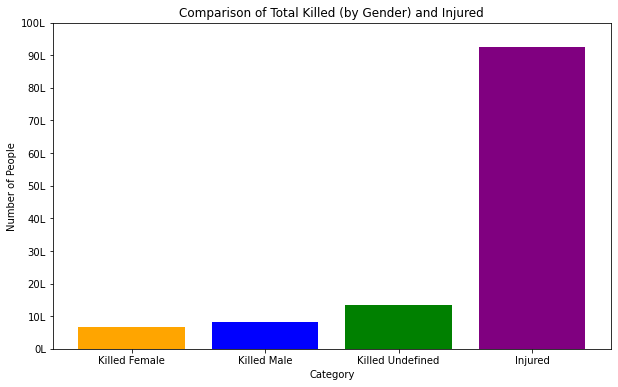

TOTAL {'Killed Female': 653217.0, 'Killed Male': 835451.0, 'Killed Undefined': 1353379.0, 'Injured': 9246719.0}


In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Calculating totals
killed_female_total = clean_data['killed female'].sum()
killed_male_total = clean_data['killed male'].sum()
killed_undefined_total = clean_data['killed undefined'].sum()
total_injuries = clean_data['injured'].sum()

# Creating a dictionary to hold all totals for visualization
totals = {
    'Killed Female': killed_female_total,
    'Killed Male': killed_male_total,
    'Killed Undefined': killed_undefined_total,
    'Injured': total_injuries
}

# Function to format the y-axis in Lakhs (L)
def lakhs_formatter(x, pos):
    return f'{int(x / 100000)}L'

# Plotting the bar chart with totals
plt.figure(figsize=(10, 6))
plt.bar(totals.keys(), totals.values(), color=['orange', 'blue', 'green', 'purple'])

# Adding titles and labels
plt.title('Comparison of Total Killed (by Gender) and Injured')
plt.xlabel('Category')
plt.ylabel('Number of People')

# Set y-axis intervals of 100,000 and format them in Lakhs (L)
plt.yticks(np.arange(0, max(totals.values()) + 1000000, 1000000))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lakhs_formatter))

plt.show()
print("TOTAL",totals)

### Comparsion of Killed and  Injured Over Time

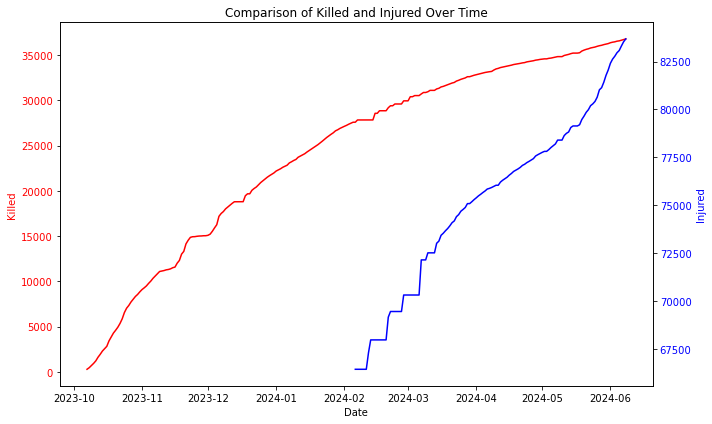

Killed Total {'Killed Female': 653217.0, 'Killed Male': 835451.0, 'Killed Undefined': 1353379.0, 'Injured': 9246719.0}


In [106]:
import matplotlib.pyplot as plt

# Ensure the 'date' column is datetime
clean_data['date'] = pd.to_datetime(clean_data['date'])

# Plot using two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting killed on the first axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Killed', color='red')
ax1.plot(clean_data['date'], clean_data['killed total'], color='red', label='Total Killed')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis for injured
ax2 = ax1.twinx()
ax2.set_ylabel('Injured', color='blue')
ax2.plot(clean_data['date'], clean_data['injured'], color='blue', label='Injured')
ax2.tick_params(axis='y', labelcolor='blue')

# Add a title
plt.title('Comparison of Killed and Injured Over Time')

fig.tight_layout()
plt.show()
print("Killed Total",totals)

### 4.2  Killed Metrics

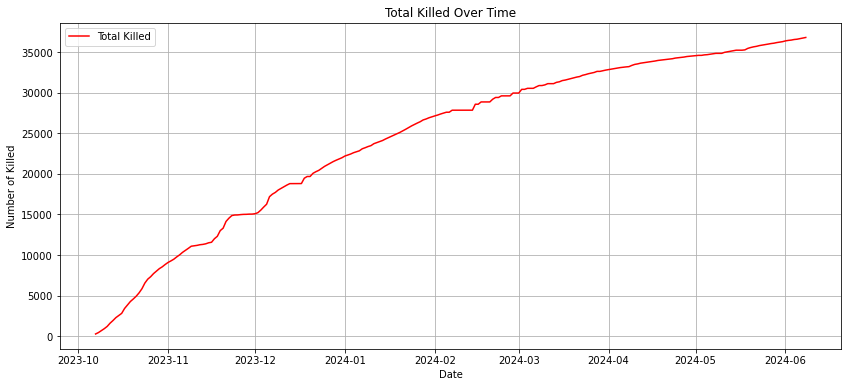

TOTAL PEOPLE KILLED =  5996135


In [107]:
# Plot total killed over time
plt.figure(figsize=(14, 6))
plt.plot(clean_data['date'], clean_data['killed total'], label='Total Killed', color='red')
plt.title('Total Killed Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Killed')
plt.legend()
plt.grid(True)
plt.show()
Total_Killed = clean_data['killed total'].sum()
print("TOTAL PEOPLE KILLED = ",Total_Killed)

### Killed Breakdown by Gender
 bar chart to show the breakdown of killed persons by gender.

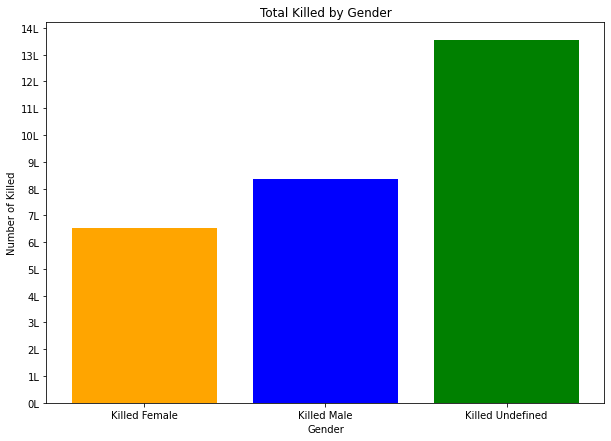

Total Killed Stats {'Killed Female': 653217.0, 'Killed Male': 835451.0, 'Killed Undefined': 1353379.0}


In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Using the correct values for the bar chart
killed_female_total = clean_data['killed female'].sum()
killed_male_total = clean_data['killed male'].sum()
killed_undefined_total = clean_data['killed undefined'].sum()

gender_killed_totals = {
    'Killed Female': killed_female_total,
    'Killed Male': killed_male_total,
    'Killed Undefined': killed_undefined_total
}

# Function to format the y-axis in Lakhs (L)
def lakhs_formatter(x, pos):
    return f'{int(x / 100000)}L'

# Plotting the bar chart
plt.figure(figsize=(10, 7))
plt.bar(gender_killed_totals.keys(), gender_killed_totals.values(), color=['orange', 'blue', 'green'])

# Adding titles and labels
plt.title('Total Killed by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Killed')

# Set y-axis intervals of 100,000 and format them in Lakhs (L)
plt.yticks(np.arange(0, max(gender_killed_totals.values()) + 100000, 100000))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lakhs_formatter))
plt.show()
print("Total Killed Stats",gender_killed_totals)


### Killed by Gender Over Time 

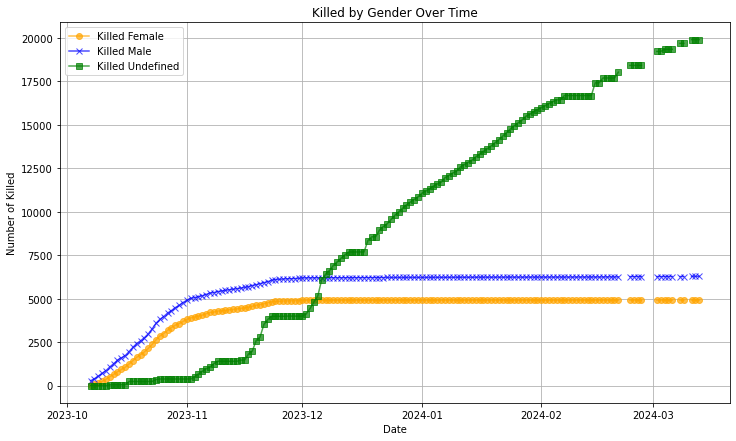

Total Killed Stats {'Killed Female': 653217.0, 'Killed Male': 835451.0, 'Killed Undefined': 1353379.0}


In [109]:
plt.figure(figsize=(12, 7))
plt.plot(clean_data['date'], clean_data['killed female'], label='Killed Female', color='orange', marker='o', alpha=0.7)
plt.plot(clean_data['date'], clean_data['killed male'], label='Killed Male', color='blue', marker='x', alpha=0.7)
plt.plot(clean_data['date'], clean_data['killed undefined'], label='Killed Undefined', color='green', marker='s', alpha=0.7)

plt.title('Killed by Gender Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Killed')
plt.legend()
plt.grid(True)
plt.show()
print("Total Killed Stats",gender_killed_totals)

### Injuries and Displacements Over Time
Track injuries and displacements over time using a line chart.

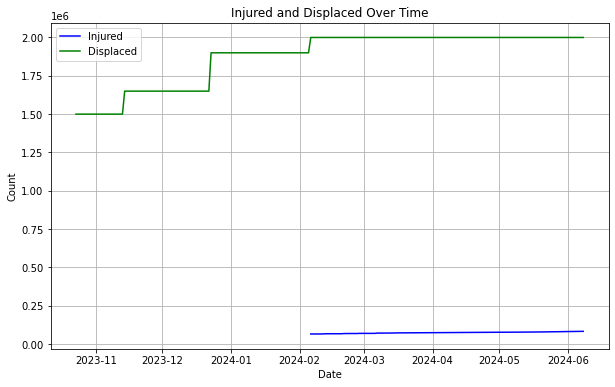

Total Injured 9246719.0
Total Displaced 428850000.0


In [124]:
# Plot injuries and displacements over time
plt.figure(figsize=(10, 6))
plt.plot(clean_data['date'], clean_data['injured'], label='Injured', color='blue')
plt.plot(clean_data['date'], clean_data['displaced'], label='Displaced', color='green')
plt.title('Injured and Displaced Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()
print("Total Injured",clean_data["injured"].sum())
print("Total Displaced",clean_data["displaced"].sum())

### Damaged Housing Units Over Time
a line chart for tracking damaged housing units.

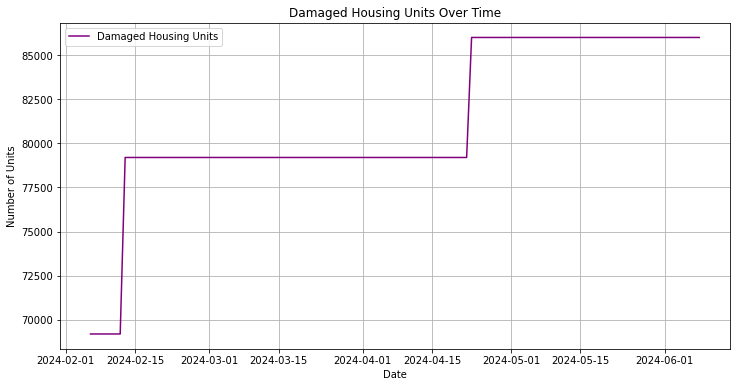

Total Damaged Housing 86000.0


In [139]:
# Plot damaged housing units over time
plt.figure(figsize=(12, 6))
plt.plot(clean_data['date'], clean_data['damaged housing units'], label='Damaged Housing Units', color='purple')
plt.title('Damaged Housing Units Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Units')
plt.legend()
plt.grid(True)
plt.show()
print("Total Damaged Housing",clean_data['damaged housing units'][244])

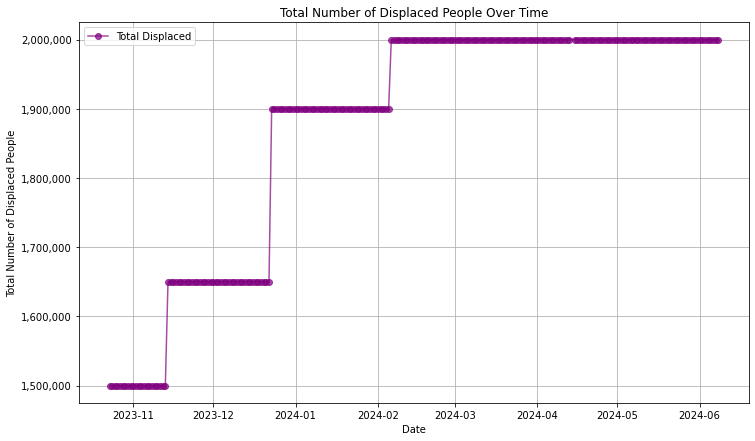

Total Number of Displaced People 2000000.0


In [137]:
# Ensure the 'date' column is in datetime format
clean_data['date'] = pd.to_datetime(clean_data['date'])

# Plot the trend of total displaced people over time (without cumulative sum)
plt.figure(figsize=(12, 7))
plt.plot(clean_data['date'], clean_data['displaced'], label='Total Displaced', color='purple', marker='o', alpha=0.7)

# Adding titles and labels
plt.title('Total Number of Displaced People Over Time')
plt.xlabel('Date')
plt.ylabel('Total Number of Displaced People')

# Format the y-axis to show the exact count with commas for thousands
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Enable gridlines for better readability
plt.grid(True)

# Show the plot
plt.legend()
plt.show()
print("Total Number of Displaced People",clean_data['displaced'][244])